In [1]:
# Importar librerías
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración
plt.style.use('default')
sns.set_palette("husl")

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [2]:
# 1. CARGAR HOSPITALES (con encoding correcto)
hospitales = pd.read_csv('../data/hospitales.csv', encoding='latin-1')
print("✅ Hospitales cargados:", hospitales.shape) # entrega filas y columnas (F,C)

# 2. CARGAR DISTRITOS
distritos = gpd.read_file('../data/distritos.geojson')
print("✅ Distritos cargados:", distritos.shape)

# 3. CARGAR CENTROS POBLADOS
try:
    centros = pd.read_csv('../data/centros_poblados.csv', encoding='utf-8')
except:
    centros = pd.read_csv('../data/centros_poblados.csv', encoding='latin-1')
print("✅ Centros poblados cargados:", centros.shape)

✅ Hospitales cargados: (20819, 33)
✅ Distritos cargados: (1834, 17)
✅ Centros poblados cargados: (94922, 9)


In [3]:
import os
# Ver qué archivos hay en data/
print("📂 Archivos en data/:")
print(os.listdir('../data/'))

📂 Archivos en data/:
['centros_poblados.csv', 'departamentos.geojson', 'distritos.geojson', 'hospitales.csv']


In [4]:
# Ver columnas de hospitales
print("\n📊 COLUMNAS DE HOSPITALES:")
print(hospitales.columns.tolist())

print("\n📊 PRIMERAS 5 FILAS:")
hospitales.head()


📊 COLUMNAS DE HOSPITALES:
['Institución', 'Código Único', 'Nombre del establecimiento', 'Clasificación', 'Tipo', 'Departamento', 'Provincia', 'Distrito', 'UBIGEO', 'Dirección', 'Código DISA', 'Código Red', 'Código Microrred', 'DISA', 'Red', 'Microrred', 'Código UE', 'Unidad Ejecutora', 'Categoria', 'Teléfono', 'Tipo Doc.Categorización', 'Nro.Doc.Categorización', 'Horario', 'Inicio de Actividad', 'Director Médico y/o Responsable de la Atención de Salud', 'Estado', 'Situación', 'Condición', 'Inspección', 'NORTE', 'ESTE', 'COTA', 'CAMAS']

📊 PRIMERAS 5 FILAS:


,Institución,Código Único,Nombre del establecimiento,Clasificación,Tipo,Departamento,Provincia,Distrito,UBIGEO,Dirección,...,Inicio de Actividad,Director Médico y/o Responsable de la Atención de Salud,Estado,Situación,Condición,Inspección,NORTE,ESTE,COTA,CAMAS
0,PRIVADO,16618,SONRIE MAS,CONSULTORIOS MEDICOS Y DE OTROS PROFESIONALES ...,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,LIMA,SANTIAGO DE SURCO,150140,"AV. CAMINOS DEL INCA 2028 OF.201, URBANIZACION...",...,11/03/2013,GILBERTO MARTIN AQUIJE GAVILAN,ACTIVADO,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN
1,GOBIERNO REGIONAL,7050,AMBATO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,CAJAMARCA,CUTERVO,SANTA CRUZ,60611,COMUNIDAD DE AMBATO,...,29/06/2006,IDELSO MENOR CHAVEZ,ACTIVADO,,EN FUNCIONAMIENTO,,-78.858380,-6.133523,1724.0,NaN
2,GOBIERNO REGIONAL,99,SANTA ISABEL DE YUMBATURO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LORETO,LORETO,PARINARI,160302,ACTUALIZAR,...,01/01/1900,JULIO TONY CAITIMARI MACHOA,ACTIVADO,,EN FUNCIONAMIENTO,,-74.258139,-4.581509,124.0,NaN
3,PRIVADO,19555,DENTOCAPLINA,CONSULTORIOS MEDICOS Y DE OTROS PROFESIONALES ...,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,TACNA,TACNA,TACNA,230101,AV.LEGUIA 1892,...,30/12/2014,BYANCA LISSETTE ARANDA LANCHIPA,ACTIVADO,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN
4,OTRO,18792,MEDICO DE FAMILIA MANTARA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,JUNIN,TARMA,TARMA,120701,JR. ROSA ZAPATEL S/N - BARRIO MANTARA - TARMA,...,06/07/2014,LILIAN DENISE ADAUTO DE LA CRUZ,ACTIVADO,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN


In [5]:
# 1. VER INFO DE HOSPITALES
print("=" * 50)
print("📊 INFORMACIÓN DE HOSPITALES")
print("=" * 50)
print(f"Total de registros: {len(hospitales)}")

print(f"\nColumnas importantes:")
print(hospitales[['Nombre del establecimiento', 'Clasificación', 'Departamento', 
                  'Distrito', 'Estado', 'NORTE', 'ESTE']].head())

# 2. VER VALORES ÚNICOS DE ESTADO
print("\n" + "=" * 50)
print("📋 VALORES DE 'ESTADO' (para filtrar operativos):")
print("=" * 50)
print(hospitales['Estado'].value_counts())

📊 INFORMACIÓN DE HOSPITALES
Total de registros: 20819

Columnas importantes:
  Nombre del establecimiento  \
0                 SONRIE MAS   
1                     AMBATO   
2  SANTA ISABEL DE YUMBATURO   
3               DENTOCAPLINA   
4  MEDICO DE FAMILIA MANTARA   

                                       Clasificación Departamento  \
0  CONSULTORIOS MEDICOS Y DE OTROS PROFESIONALES ...         LIMA   
1                 PUESTOS DE SALUD O POSTAS DE SALUD    CAJAMARCA   
2                 PUESTOS DE SALUD O POSTAS DE SALUD       LORETO   
3  CONSULTORIOS MEDICOS Y DE OTROS PROFESIONALES ...        TACNA   
4                 PUESTOS DE SALUD O POSTAS DE SALUD        JUNIN   

            Distrito    Estado      NORTE      ESTE  
0  SANTIAGO DE SURCO  ACTIVADO        NaN       NaN  
1         SANTA CRUZ  ACTIVADO -78.858380 -6.133523  
2           PARINARI  ACTIVADO -74.258139 -4.581509  
3              TACNA  ACTIVADO        NaN       NaN  
4              TARMA  ACTIVADO        NaN    

In [6]:
# 3. FILTRAR: Coordenadas válidas Y diferentes de cero
print("🧹 LIMPIANDO DATOS...")
print(f"Registros originales: {len(hospitales)}")

# Eliminar registros sin coordenadas O con coordenadas en 0
hospitales_clean = hospitales[
    (hospitales['NORTE'].notna()) &    # No vacío
    (hospitales['ESTE'].notna()) &      # No vacío
    (hospitales['NORTE'] != 0) &        # No es cero
    (hospitales['ESTE'] != 0)           # No es cero
].copy()

print(f"Después de limpieza: {len(hospitales_clean)}")
print(f"Registros eliminados: {len(hospitales) - len(hospitales_clean)}")

🧹 LIMPIANDO DATOS...
Registros originales: 20819
Después de limpieza: 7953
Registros eliminados: 12866


In [7]:
# VER QUÉ VALORES HAY EN LA COLUMNA ESTADO
print("\n📊 VALORES EN COLUMNA 'ESTADO':")
print(hospitales_clean['Estado'].value_counts())

print("\n📊 VALORES ÚNICOS:")
print(hospitales_clean['Estado'].unique())


📊 VALORES EN COLUMNA 'ESTADO':
Estado
ACTIVADO    7953
Name: count, dtype: int64

📊 VALORES ÚNICOS:
['ACTIVADO']


In [8]:
# 4. FILTRAR: Solo hospitales OPERATIVOS
print("\n🏥 FILTRANDO HOSPITALES OPERATIVOS...")
print(f"Antes del filtro: {len(hospitales_clean)}")

# Ver qué valores tiene la columna ESTADO
print("\n📊 Valores en columna ESTADO:")
print(hospitales_clean['Estado'].value_counts())

# Filtrar solo operativos (ajusta según lo que veas)
# Probablemente sea algo como: "ACTIVO", "OPERATIVO", "FUNCIONANDO", etc.
hospitales_operativos = hospitales_clean[
    hospitales_clean['Estado'].str.upper().str.contains('ACTIVADO|ACTIVO|OPERATIVO|FUNCIONANDO', na=False)
].copy()

print(f"\n✅ Hospitales operativos: {len(hospitales_operativos)}")


🏥 FILTRANDO HOSPITALES OPERATIVOS...
Antes del filtro: 7953

📊 Valores en columna ESTADO:
Estado
ACTIVADO    7953
Name: count, dtype: int64

✅ Hospitales operativos: 7953


In [9]:
# VER COLUMNAS DISPONIBLES
print("\n📋 COLUMNAS DISPONIBLES:")
print(hospitales_clean.columns.tolist())

# VER VALORES EN COLUMNA 'INSTITUCIÓN' (o similar)
print("\n🏛️ VALORES EN COLUMNA 'Institucion':")
print(hospitales_clean['Institución'].value_counts())


📋 COLUMNAS DISPONIBLES:
['Institución', 'Código Único', 'Nombre del establecimiento', 'Clasificación', 'Tipo', 'Departamento', 'Provincia', 'Distrito', 'UBIGEO', 'Dirección', 'Código DISA', 'Código Red', 'Código Microrred', 'DISA', 'Red', 'Microrred', 'Código UE', 'Unidad Ejecutora', 'Categoria', 'Teléfono', 'Tipo Doc.Categorización', 'Nro.Doc.Categorización', 'Horario', 'Inicio de Actividad', 'Director Médico y/o Responsable de la Atención de Salud', 'Estado', 'Situación', 'Condición', 'Inspección', 'NORTE', 'ESTE', 'COTA', 'CAMAS']

🏛️ VALORES EN COLUMNA 'Institucion':
Institución
GOBIERNO REGIONAL                          7136
MINSA                                       394
ESSALUD                                     194
PRIVADO                                     167
SANIDAD DEL EJERCITO DEL PERU                25
SANIDAD DE LA POLICIA NACIONAL DEL PERU      13
SANIDAD DE LA FUERZA AEREA DEL PERU          10
SANIDAD DE LA MARINA DE GUERRA DEL PERU       6
MUNICIPALIDAD PROVINCIAL 

In [10]:
# 5. FILTRAR: Solo hospitales PÚBLICOS
print("\n🏛️ FILTRANDO HOSPITALES PÚBLICOS...")
print(f"Antes del filtro: {len(hospitales_clean)}")

hospitales_publicos = hospitales_clean[
    hospitales_clean['Institución'].isin(['GOBIERNO REGIONAL', 'MINSA', 'ESSALUD'])
].copy()

print(f"✅ Hospitales públicos: {len(hospitales_publicos)}")
print(f"❌ Privados eliminados: {len(hospitales_clean) - len(hospitales_publicos)}")

# Verificar distribución
print("\n📊 DISTRIBUCIÓN DE HOSPITALES PÚBLICOS:")
print(hospitales_publicos['Institución'].value_counts())


🏛️ FILTRANDO HOSPITALES PÚBLICOS...
Antes del filtro: 7953
✅ Hospitales públicos: 7724
❌ Privados eliminados: 229

📊 DISTRIBUCIÓN DE HOSPITALES PÚBLICOS:
Institución
GOBIERNO REGIONAL    7136
MINSA                 394
ESSALUD               194
Name: count, dtype: int64


In [11]:
# ==============================================================
# DIAGNÓSTICO CORRECTO: Verificar rango de coordenadas
# ==============================================================

print("\n🔍 VERIFICANDO COORDENADAS...")

print(f"\nESTE (Latitud):")
print(f"  Mínimo: {hospitales_publicos['ESTE'].min():.4f}°")
print(f"  Máximo: {hospitales_publicos['ESTE'].max():.4f}°")

print(f"\nNORTE (Longitud):")
print(f"  Mínimo: {hospitales_publicos['NORTE'].min():.4f}°")
print(f"  Máximo: {hospitales_publicos['NORTE'].max():.4f}°")

# Verificar que están dentro de Perú
# Perú: Longitud -81° a -68°, Latitud -18° a 0°
print("\n✅ CONCLUSIÓN:")
print("   Las coordenadas YA están en grados (EPSG:4326)")
print("   NO necesitan conversión desde UTM")
print("   Columnas invertidas: NORTE=Longitud, ESTE=Latitud")


🔍 VERIFICANDO COORDENADAS...

ESTE (Latitud):
  Mínimo: -18.3354°
  Máximo: -0.0974°

NORTE (Longitud):
  Mínimo: -81.3106°
  Máximo: -68.7759°

✅ CONCLUSIÓN:
   Las coordenadas YA están en grados (EPSG:4326)
   NO necesitan conversión desde UTM
   Columnas invertidas: NORTE=Longitud, ESTE=Latitud


#### Preparación de data

In [12]:
# ==============================================================
# 1: CONVERTIR HOSPITALES A GEODATAFRAME
# ==============================================================

print("\n🌍 CONVIRTIENDO HOSPITALES A GEODATAFRAME...")

# Crear GeoDataFrame (columnas invertidas: NORTE=Longitud, ESTE=Latitud)
hospitales_gdf = gpd.GeoDataFrame(
    hospitales_publicos,
    geometry=gpd.points_from_xy(
        hospitales_publicos['NORTE'],  # X = Longitud
        hospitales_publicos['ESTE']    # Y = Latitud
    ),
    crs='EPSG:4326'  # ← Le indicas a python que estas coordenadas son grados lat/lon
)

print(f"✅ GeoDataFrame creado: {len(hospitales_gdf)} hospitales")
print(f"📊 CRS: {hospitales_gdf.crs}")


🌍 CONVIRTIENDO HOSPITALES A GEODATAFRAME...
✅ GeoDataFrame creado: 7724 hospitales
📊 CRS: EPSG:4326


In [13]:
# ==============================================================
# 2.PREPARAR shapefile DISTRITOS
# ==============================================================

print("\n🗺️ PREPARANDO DISTRITOS...")

# Asegurar que distritos está en EPSG:4326
distritos = distritos.to_crs('EPSG:4326')
print(f"✅ Distritos en CRS: {distritos.crs}")
print(f"📊 Total distritos: {len(distritos)}")

# Ver columnas disponibles
print("\n🔍 Columnas de distritos:")
print(distritos.columns.tolist())


🗺️ PREPARANDO DISTRITOS...
✅ Distritos en CRS: EPSG:4326
📊 Total distritos: 1834

🔍 Columnas de distritos:
['OBJECTID', 'IDDIST', 'IDDPTO', 'IDPROV', 'NOMBDIST', 'NOMBPROV', 'NOMBDEP', 'DCTO', 'LEY', 'FECHA', 'NOM_CAP', 'SHAPE_LENG', 'SHAPE_AREA', 'SHAPE_LE_1', 'SHAPE_AR_1', 'AREA_MINAM', 'geometry']


In [14]:
# ==============================================================
# 3. SPATIAL JOIN: Asignar cada hospital a su distrito
# ==============================================================

print("\n🔗 REALIZANDO SPATIAL JOIN...")

# Unir hospitales con distritos según ubicación espacial
hospitales_con_distrito = gpd.sjoin(
    hospitales_gdf,  #puntos de los hospitales 
    distritos[['NOMBDIST', 'geometry']],  # Áreas de distritos donde se ubicarían los puntos 
    how='left', 
    predicate='within' #Une el hospital con el distrito si el punto está dentro del área
)

print(f"✅ Spatial join completado")
print(f"📊 Hospitales con distrito asignado: {hospitales_con_distrito['NOMBDIST'].notna().sum()}")
print(f"⚠️ Hospitales sin distrito: {hospitales_con_distrito['NOMBDIST'].isna().sum()}")


🔗 REALIZANDO SPATIAL JOIN...
✅ Spatial join completado
📊 Hospitales con distrito asignado: 7700
⚠️ Hospitales sin distrito: 24


In [15]:
# ==============================================================
# 4. CONTAR HOSPITALES POR DISTRITO
# ==============================================================

print("\n📊 CONTANDO HOSPITALES POR DISTRITO...")

# Contar hospitales por distrito
conteo_hospitales = hospitales_con_distrito.groupby('NOMBDIST').size().reset_index(name='num_hospitales')

print(f"✅ Distritos con al menos 1 hospital: {len(conteo_hospitales)}")

# Unir conteo con shapefile de distritos
distritos_con_hospitales = distritos.merge(
    conteo_hospitales, 
    on='NOMBDIST',  # Ajusta según tu columna
    how='left'
)

# Rellenar distritos sin hospitales con 0
distritos_con_hospitales['num_hospitales'] = distritos_con_hospitales['num_hospitales'].fillna(0).astype(int)

print(f"\n📊 RESUMEN:")
print(f"Total distritos: {len(distritos_con_hospitales)}")
print(f"Distritos CON hospitales: {(distritos_con_hospitales['num_hospitales'] > 0).sum()}")
print(f"Distritos SIN hospitales: {(distritos_con_hospitales['num_hospitales'] == 0).sum()}")

print(f"\n🏆 TOP 10 DISTRITOS CON MÁS HOSPITALES:")
print(distritos_con_hospitales.nlargest(10, 'num_hospitales')[['NOMBDIST', 'num_hospitales']])


📊 CONTANDO HOSPITALES POR DISTRITO...
✅ Distritos con al menos 1 hospital: 1603

📊 RESUMEN:
Total distritos: 1834
Distritos CON hospitales: 1752
Distritos SIN hospitales: 82

🏆 TOP 10 DISTRITOS CON MÁS HOSPITALES:
                    NOMBDIST  num_hospitales
1620                 CUTERVO              56
888   SAN JUAN DE LURIGANCHO              41
841                     LIMA              39
1777                   IMAZA              39
52                SANTA ROSA              38
282               SANTA ROSA              38
349               SANTA ROSA              38
400               SANTA ROSA              38
704               SANTA ROSA              38
864                   CALLAO              38


# 📊 Task 1.1.: Mapas Estáticos por Distrito

✅ Mapa 1 guardado


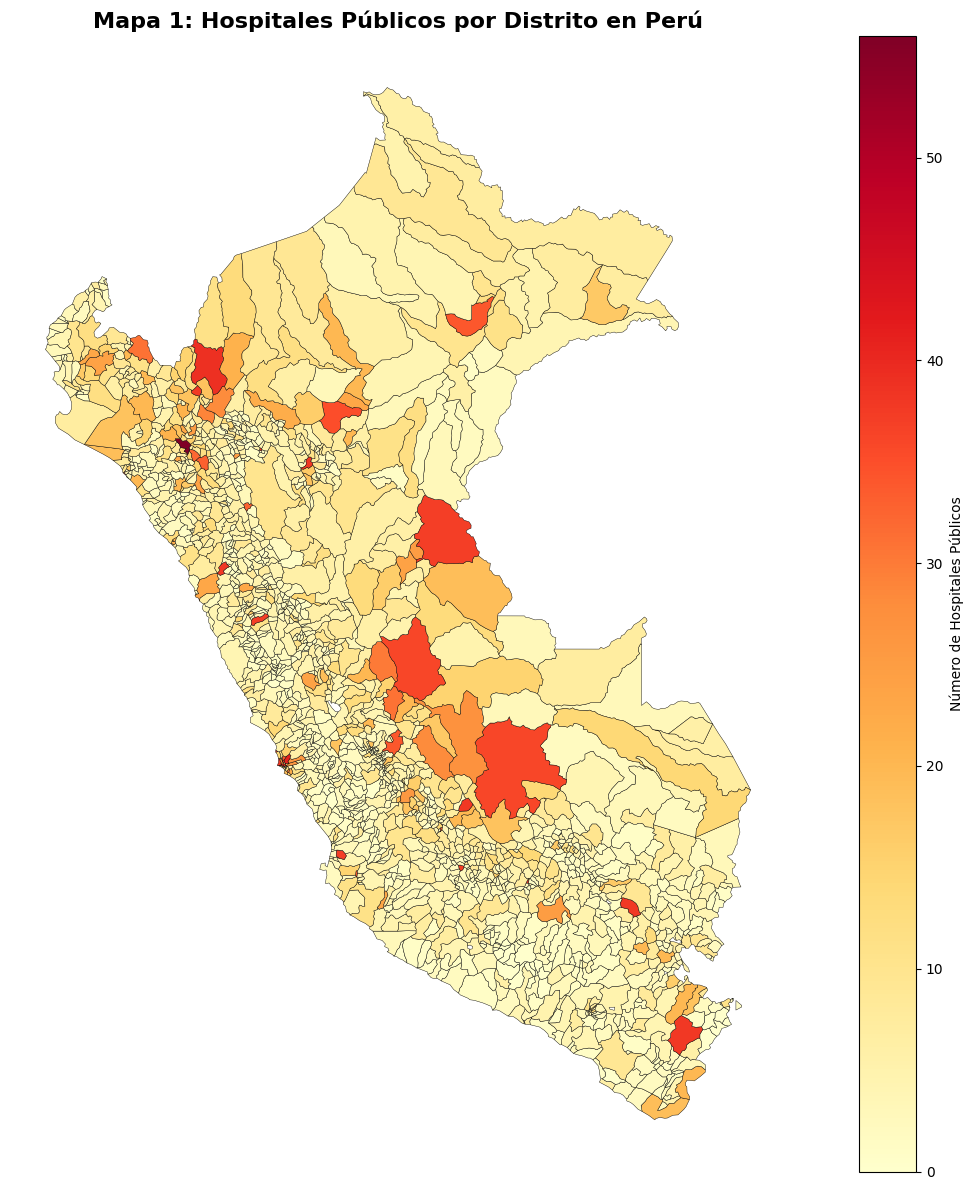

In [21]:
# ==============================================================
# MAPA 1: Total de hospitales públicos por distrito
# ==============================================================

#import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 12))

distritos_con_hospitales.plot(
    column='num_hospitales',
    cmap='YlOrRd',
    legend=True,
    ax=ax,
    edgecolor='black',
    linewidth=0.3,
    legend_kwds={'label': 'Número de Hospitales Públicos'}
)

ax.set_title('Mapa 1: Hospitales Públicos por Distrito en Perú', fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.tight_layout()
plt.savefig('../output/mapa1_hospitales_por_distrito.png', dpi=300, bbox_inches='tight')
print("✅ Mapa 1 guardado")
plt.show()

✅ Mapa 2 guardado


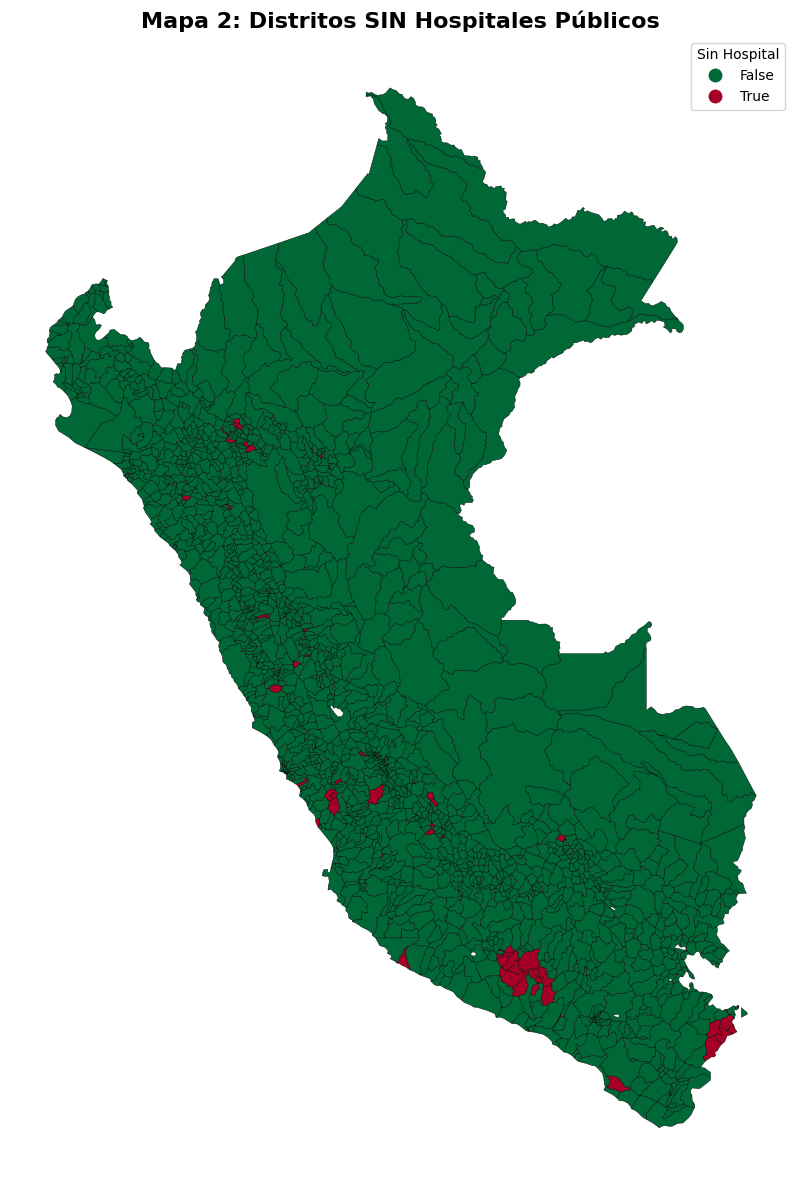

In [22]:
# ==============================================================
# MAPA 2: Distritos SIN hospitales (resaltados)
# ==============================================================

fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Crear columna para identificar distritos sin hospitales
distritos_con_hospitales['sin_hospital'] = distritos_con_hospitales['num_hospitales'] == 0

distritos_con_hospitales.plot(
    column='sin_hospital',
    cmap='RdYlGn_r',  # Rojo para sin hospitales, verde para con hospitales
    legend=True,
    ax=ax,
    edgecolor='black',
    linewidth=0.3,
    legend_kwds={'title': 'Sin Hospital'}  # ← Cambié 'label' por 'title'
)

ax.set_title('Mapa 2: Distritos SIN Hospitales Públicos', fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.tight_layout()
plt.savefig('../output/mapa2_distritos_sin_hospitales.png', dpi=300, bbox_inches='tight')
print("✅ Mapa 2 guardado")
plt.show()

✅ Mapa 3 guardado


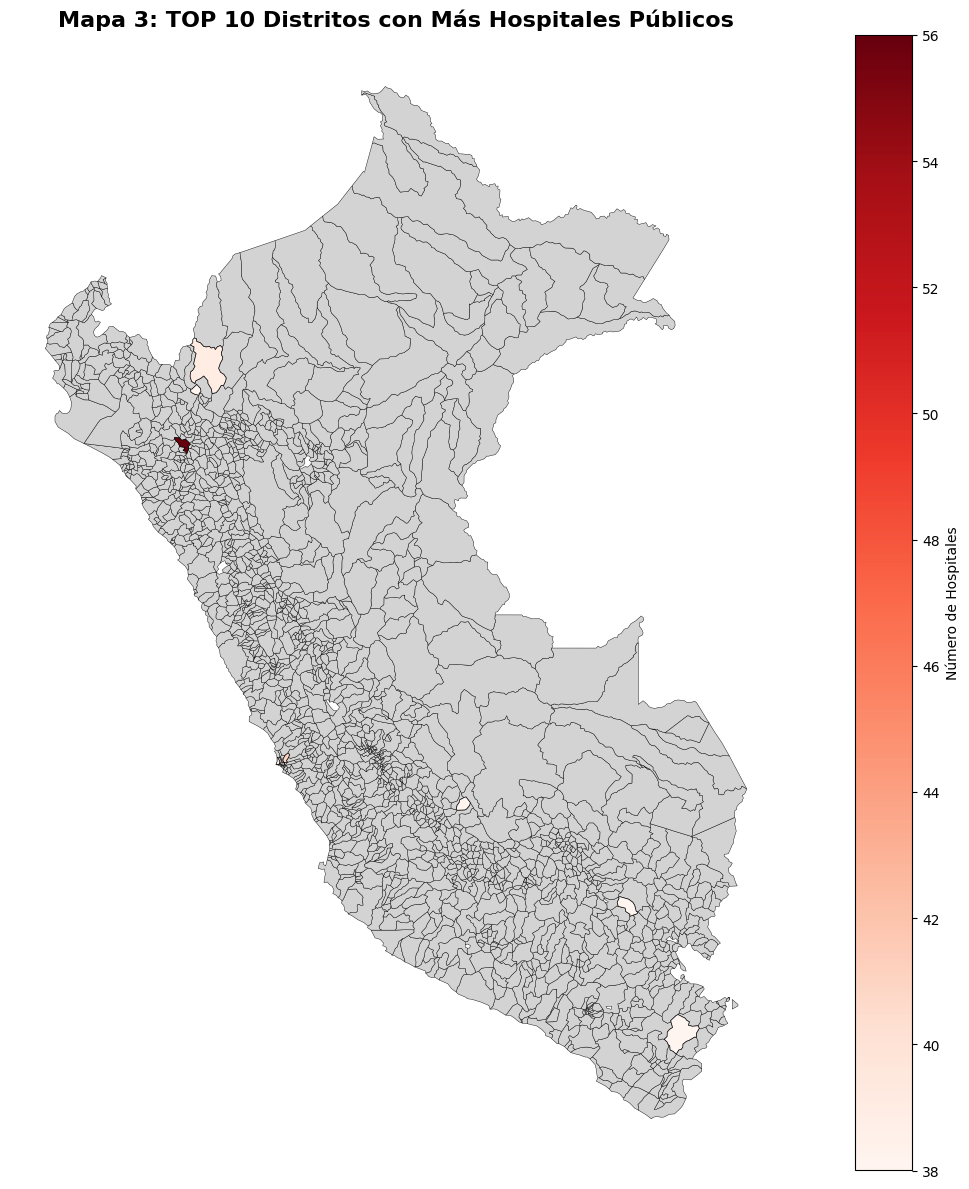

In [23]:
# ==============================================================
# MAPA 3: TOP 10 distritos con más hospitales
# ==============================================================

# Obtener top 10
top10 = distritos_con_hospitales.nlargest(10, 'num_hospitales')

fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Crear columna para colorear solo top 10
distritos_con_hospitales['es_top10'] = distritos_con_hospitales['NOMBDIST'].isin(top10['NOMBDIST'])

# Plotear todos los distritos en gris
distritos_con_hospitales[~distritos_con_hospitales['es_top10']].plot(
    ax=ax,
    color='lightgray',
    edgecolor='black',
    linewidth=0.3
)

# Plotear top 10 en colores
top10.plot(
    column='num_hospitales',
    cmap='Reds',
    legend=True,
    ax=ax,
    edgecolor='black',
    linewidth=0.5,
    legend_kwds={'label': 'Número de Hospitales'}
)

ax.set_title('Mapa 3: TOP 10 Distritos con Más Hospitales Públicos', fontsize=16, fontweight='bold')
ax.set_axis_off()

plt.tight_layout()
plt.savefig('../output/mapa3_top10_distritos.png', dpi=300, bbox_inches='tight')
print("✅ Mapa 3 guardado")
plt.show()

In [25]:
# ==============================================================
# TABLA: TOP 10 DISTRITOS CON MÁS HOSPITALES
# ==============================================================

# Obtener TOP 10
top10_tabla = distritos_con_hospitales.nlargest(10, 'num_hospitales')[['NOMBDIST', 'num_hospitales']]

# Resetear índice para que se vea mejor
top10_tabla = top10_tabla.reset_index(drop=True)
top10_tabla.index = top10_tabla.index + 1  # Empezar desde 1 en vez de 0

print("\n🏆 TOP 10 DISTRITOS CON MÁS HOSPITALES PÚBLICOS")
print("="*50)
print(top10_tabla.to_string())

# Guardar como CSV
top10_tabla.to_csv('../output/top10_distritos_hospitales.csv', index=True, index_label='Ranking')
print("\n✅ Tabla guardada en: ../output/top10_distritos_hospitales.csv")


🏆 TOP 10 DISTRITOS CON MÁS HOSPITALES PÚBLICOS
                  NOMBDIST  num_hospitales
1                  CUTERVO              56
2   SAN JUAN DE LURIGANCHO              41
3                     LIMA              39
4                    IMAZA              39
5               SANTA ROSA              38
6               SANTA ROSA              38
7               SANTA ROSA              38
8               SANTA ROSA              38
9               SANTA ROSA              38
10                  CALLAO              38

✅ Tabla guardada en: ../output/top10_distritos_hospitales.csv


# 📊 Task 1.2: Análisis por Departamento

In [26]:
# ==============================================================
# ANÁLISIS POR DEPARTAMENTO
# ==============================================================

print("\n📊 TASK 2: ANÁLISIS POR DEPARTAMENTO")
print("="*60)

# Verificar qué columna tiene el departamento
print("\n🔍 Columnas disponibles en hospitales:")
print(hospitales_gdf.columns.tolist())

# Asumo que la columna se llama 'DEPARTAMENTO' o 'Departamento'
# Ajusta el nombre según tu dataset
columna_depto = 'Departamento'  # Cambiar si es necesario

# Contar hospitales por departamento
hospitales_por_depto = hospitales_gdf.groupby(columna_depto).size().reset_index(name='num_hospitales')

# Ordenar de mayor a menor
hospitales_por_depto = hospitales_por_depto.sort_values('num_hospitales', ascending=False)

print(f"\n✅ Total de departamentos: {len(hospitales_por_depto)}")
print(f"✅ Total de hospitales: {hospitales_por_depto['num_hospitales'].sum()}")


📊 TASK 2: ANÁLISIS POR DEPARTAMENTO

🔍 Columnas disponibles en hospitales:
['Institución', 'Código Único', 'Nombre del establecimiento', 'Clasificación', 'Tipo', 'Departamento', 'Provincia', 'Distrito', 'UBIGEO', 'Dirección', 'Código DISA', 'Código Red', 'Código Microrred', 'DISA', 'Red', 'Microrred', 'Código UE', 'Unidad Ejecutora', 'Categoria', 'Teléfono', 'Tipo Doc.Categorización', 'Nro.Doc.Categorización', 'Horario', 'Inicio de Actividad', 'Director Médico y/o Responsable de la Atención de Salud', 'Estado', 'Situación', 'Condición', 'Inspección', 'NORTE', 'ESTE', 'COTA', 'CAMAS', 'geometry']

✅ Total de departamentos: 25
✅ Total de hospitales: 7724


In [27]:
# ==============================================================
# IDENTIFICAR DEPARTAMENTOS CON MÁS Y MENOS HOSPITALES
# ==============================================================

# Departamento con MÁS hospitales
depto_max = hospitales_por_depto.iloc[0]
print(f"\n🏆 DEPARTAMENTO CON MÁS HOSPITALES:")
print(f"   {depto_max[columna_depto]}: {depto_max['num_hospitales']} hospitales")

# Departamento con MENOS hospitales
depto_min = hospitales_por_depto.iloc[-1]
print(f"\n📉 DEPARTAMENTO CON MENOS HOSPITALES:")
print(f"   {depto_min[columna_depto]}: {depto_min['num_hospitales']} hospitales")


🏆 DEPARTAMENTO CON MÁS HOSPITALES:
   CAJAMARCA: 843 hospitales

📉 DEPARTAMENTO CON MENOS HOSPITALES:
   TUMBES: 46 hospitales


In [28]:
# ==============================================================
# TABLA RESUMEN: HOSPITALES POR DEPARTAMENTO
# ==============================================================

print("\n📋 TABLA RESUMEN: HOSPITALES POR DEPARTAMENTO")
print("="*60)
print(hospitales_por_depto.to_string(index=False))

# Guardar como CSV
hospitales_por_depto.to_csv('../output/hospitales_por_departamento.csv', index=False)
print("\n✅ Tabla guardada en: ../output/hospitales_por_departamento.csv")


📋 TABLA RESUMEN: HOSPITALES POR DEPARTAMENTO
 Departamento  num_hospitales
    CAJAMARCA             843
         LIMA             720
        JUNIN             485
        PIURA             427
       ANCASH             415
         PUNO             403
     AMAZONAS             396
     AYACUCHO             386
   SAN MARTIN             373
     APURIMAC             371
       LORETO             350
        CUSCO             336
  LA LIBERTAD             332
 HUANCAVELICA             324
      HUANUCO             260
        PASCO             257
     AREQUIPA             221
      UCAYALI             203
   LAMBAYEQUE             180
          ICA             145
        TACNA              76
MADRE DE DIOS              64
       CALLAO              58
     MOQUEGUA              53
       TUMBES              46

✅ Tabla guardada en: ../output/hospitales_por_departamento.csv


✅ Gráfico guardado


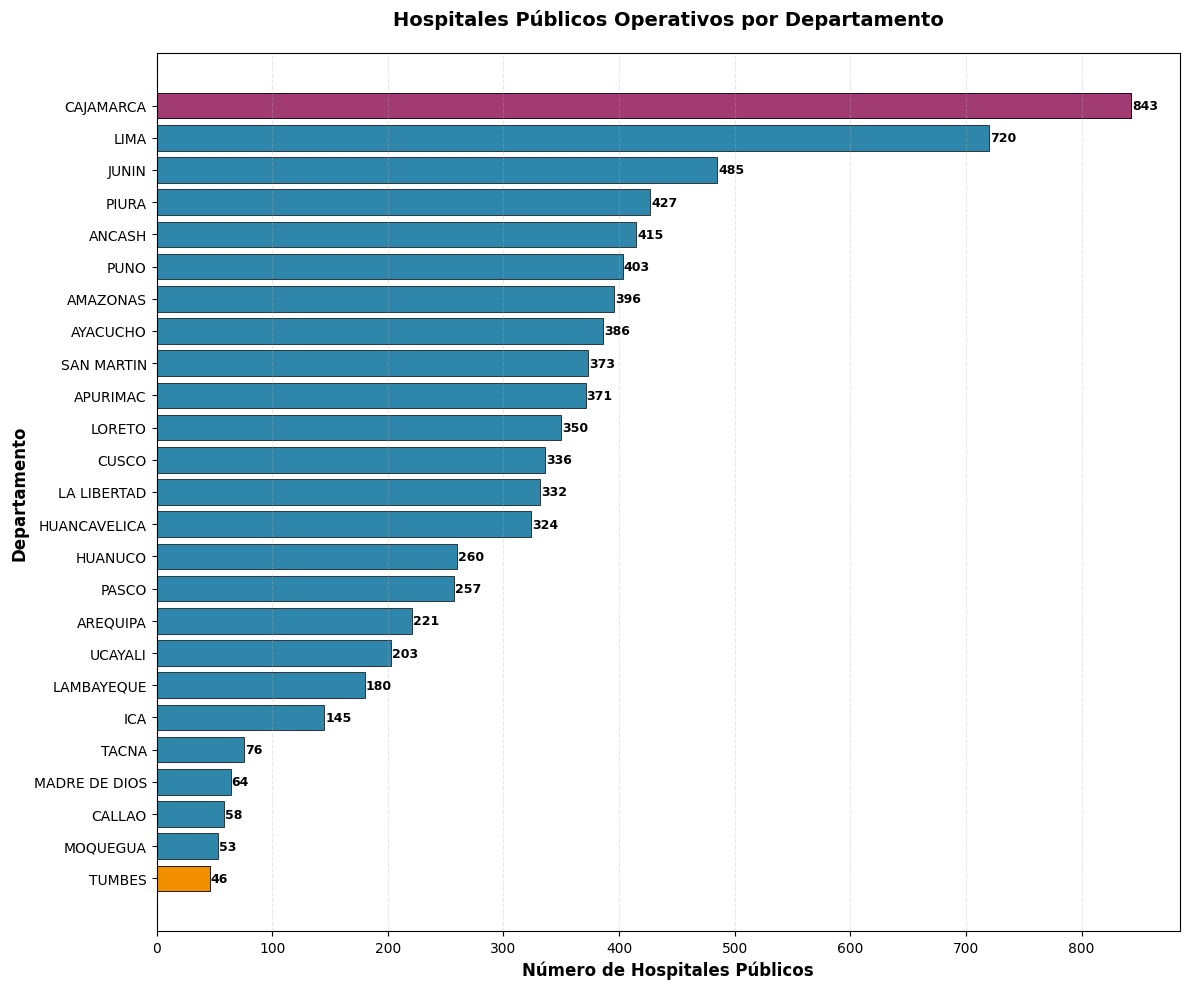

In [29]:
# ==============================================================
# GRÁFICO DE BARRAS: HOSPITALES POR DEPARTAMENTO
# ==============================================================

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 10))

# Crear gráfico de barras horizontal
ax.barh(
    hospitales_por_depto[columna_depto],
    hospitales_por_depto['num_hospitales'],
    color='#2E86AB',
    edgecolor='black',
    linewidth=0.5
)

# Resaltar el departamento con más hospitales
ax.barh(
    depto_max[columna_depto],
    depto_max['num_hospitales'],
    color='#A23B72',
    edgecolor='black',
    linewidth=0.5
)

# Resaltar el departamento con menos hospitales
ax.barh(
    depto_min[columna_depto],
    depto_min['num_hospitales'],
    color='#F18F01',
    edgecolor='black',
    linewidth=0.5
)

ax.set_xlabel('Número de Hospitales Públicos', fontsize=12, fontweight='bold')
ax.set_ylabel('Departamento', fontsize=12, fontweight='bold')
ax.set_title('Hospitales Públicos Operativos por Departamento', 
             fontsize=14, fontweight='bold', pad=20)

# Agregar valores en las barras
for i, (depto, num) in enumerate(zip(hospitales_por_depto[columna_depto], 
                                      hospitales_por_depto['num_hospitales'])):
    ax.text(num + 1, i, str(int(num)), va='center', fontsize=9, fontweight='bold')

ax.invert_yaxis()  # Mayor arriba
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('../output/grafico_hospitales_departamento.png', dpi=300, bbox_inches='tight')
print("✅ Gráfico guardado")
plt.show()


🗺️ CREANDO MAPA COROPLÉTICO POR DEPARTAMENTO...
✅ Departamentos cargados: 25
📊 CRS: EPSG:4326
✅ Departamentos con datos: 25
📊 Total hospitales: 7724

📋 RESUMEN POR DEPARTAMENTO:
      NOMBDEP  num_hospitales
    CAJAMARCA             843
         LIMA             720
        JUNIN             485
        PIURA             427
       ANCASH             415
         PUNO             403
     AMAZONAS             396
     AYACUCHO             386
   SAN MARTIN             373
     APURIMAC             371
       LORETO             350
        CUSCO             336
  LA LIBERTAD             332
 HUANCAVELICA             324
      HUANUCO             260
        PASCO             257
     AREQUIPA             221
      UCAYALI             203
   LAMBAYEQUE             180
          ICA             145
        TACNA              76
MADRE DE DIOS              64
       CALLAO              58
     MOQUEGUA              53
       TUMBES              46

✅ Mapa coroplético guardado en: ../outpu

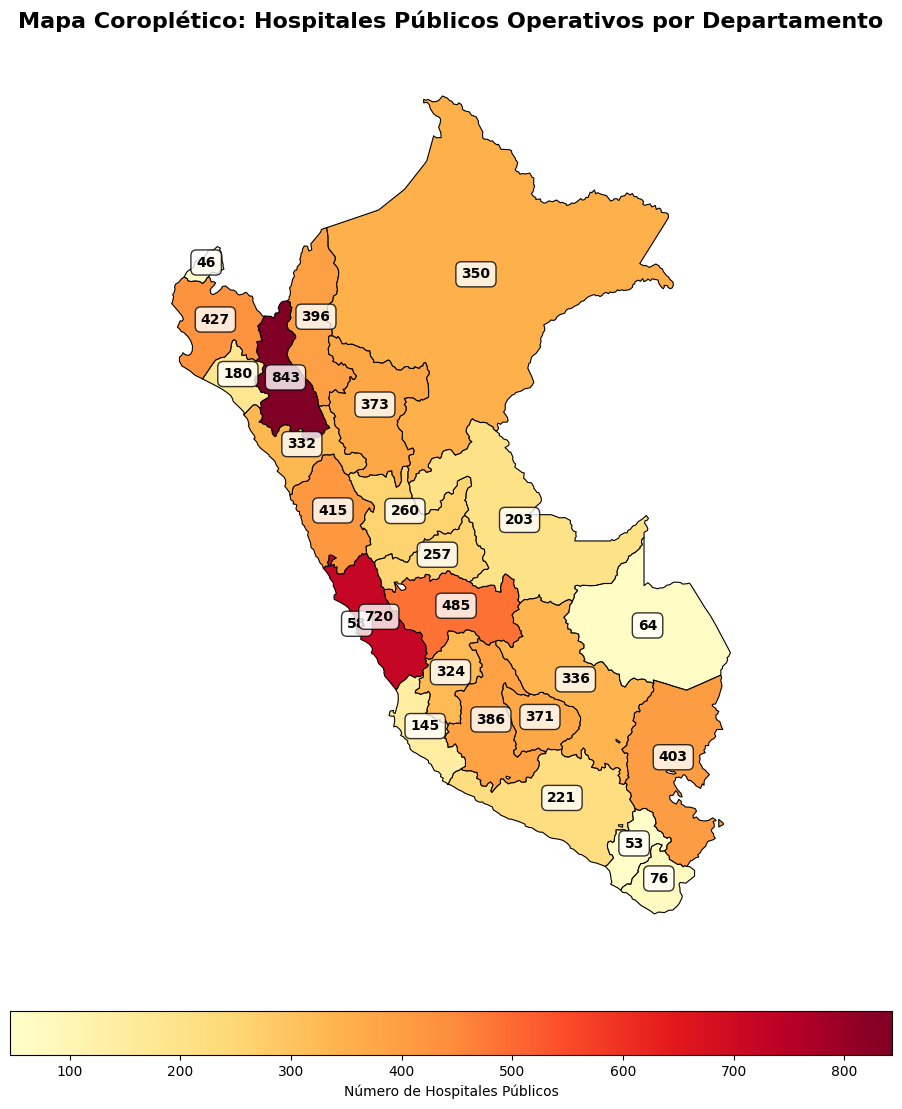

In [30]:
# ==============================================================
# MAPA COROPLÉTICO: HOSPITALES POR DEPARTAMENTO
# ==============================================================

print("\n🗺️ CREANDO MAPA COROPLÉTICO POR DEPARTAMENTO...")

# Cargar shapefile de departamentos
departamentos = gpd.read_file('../data/departamentos.geojson')
departamentos = departamentos.to_crs('EPSG:4326')

print(f"✅ Departamentos cargados: {len(departamentos)}")
print(f"📊 CRS: {departamentos.crs}")

# Unir conteo de hospitales con departamentos
departamentos_con_hospitales = departamentos.merge(
    hospitales_por_depto,
    left_on='NOMBDEP',
    right_on='Departamento',
    how='left'
)

# Rellenar departamentos sin hospitales con 0
departamentos_con_hospitales['num_hospitales'] = departamentos_con_hospitales['num_hospitales'].fillna(0).astype(int)

print(f"✅ Departamentos con datos: {len(departamentos_con_hospitales)}")
print(f"📊 Total hospitales: {departamentos_con_hospitales['num_hospitales'].sum()}")

# Ver resumen
print("\n📋 RESUMEN POR DEPARTAMENTO:")
print(departamentos_con_hospitales[['NOMBDEP', 'num_hospitales']].sort_values('num_hospitales', ascending=False).to_string(index=False))

# Crear mapa coroplético
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

departamentos_con_hospitales.plot(
    column='num_hospitales',
    cmap='YlOrRd',
    legend=True,
    ax=ax,
    edgecolor='black',
    linewidth=0.8,
    legend_kwds={
        'label': 'Número de Hospitales Públicos',
        'orientation': 'horizontal',
        'shrink': 0.6,
        'pad': 0.05
    }
)

# Agregar etiquetas con el número de hospitales en cada departamento
for idx, row in departamentos_con_hospitales.iterrows():
    centroid = row['geometry'].centroid
    ax.text(
        centroid.x, 
        centroid.y, 
        f"{int(row['num_hospitales'])}", 
        fontsize=10, 
        ha='center',
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.8, edgecolor='black')
    )

ax.set_title('Mapa Coroplético: Hospitales Públicos Operativos por Departamento', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_axis_off()

plt.tight_layout()
plt.savefig('../output/mapa_coropletico_departamentos.png', dpi=300, bbox_inches='tight')
print("\n✅ Mapa coroplético guardado en: ../output/mapa_coropletico_departamentos.png")
plt.show()

# 📊 Task 1.3:  Análisis de Proximidad (10 km)

In [31]:
# PREPARAR CENTROS POBLADOS
print("📍 PREPARANDO CENTROS POBLADOS...")

# Ver columnas
print("\nColumnas de centros poblados:")
print(centros.columns.tolist())

# Ver primeras filas
print("\nPrimeras filas:")
print(centros.head())

📍 PREPARANDO CENTROS POBLADOS...

Columnas de centros poblados:
['inei_ccpp', 'inei_distrito', 'departamento', 'provincia', 'distrito', 'ccpp', 'tipo', 'latitude', 'longitude']

Primeras filas:
   inei_ccpp  inei_distrito departamento    provincia     distrito  \
0  101010001          10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS   
1  101010002          10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS   
2  101010003          10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS   
3  101010004          10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS   
4  101010007          10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS   

          ccpp   tipo  latitude  longitude  
0  CHACHAPOYAS  Urban -6.229554 -77.872806  
1       CACLIC  Rural -6.200755 -77.901933  
2    VITALIANO  Rural -6.209867 -77.872655  
3    EL TAPIAL  Rural -6.208263 -77.867562  
4    BOCANEGRA  Rural -6.225491 -77.886864  


In [37]:
# ==============================================================
# TASK 3: ANÁLISIS DE PROXIMIDAD
# ==============================================================

print("\n📍 TASK 3: ANÁLISIS DE PROXIMIDAD")
print("="*60)

# Cargar centros poblados
print("\n📥 Cargando centros poblados...")
centros_gdf = gpd.GeoDataFrame(
    centros,
    geometry=gpd.points_from_xy(centros['longitude'], centros['latitude']),
    crs='EPSG:4326'
)

print(f"✅ Centros poblados cargados: {len(centros_gdf)}")

# Ver columnas disponibles
print("\n🔍 Columnas en centros poblados:")
print(centros_gdf.columns.tolist())

# Ver muestra
print("\n📋 Muestra de centros poblados:")
print(centros_gdf.head())


📍 TASK 3: ANÁLISIS DE PROXIMIDAD

📥 Cargando centros poblados...
✅ Centros poblados cargados: 94922

🔍 Columnas en centros poblados:
['inei_ccpp', 'inei_distrito', 'departamento', 'provincia', 'distrito', 'ccpp', 'tipo', 'latitude', 'longitude', 'geometry']

📋 Muestra de centros poblados:
   inei_ccpp  inei_distrito departamento    provincia     distrito  \
0  101010001          10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS   
1  101010002          10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS   
2  101010003          10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS   
3  101010004          10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS   
4  101010007          10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS   

          ccpp   tipo  latitude  longitude                    geometry  
0  CHACHAPOYAS  Urban -6.229554 -77.872806  POINT (-77.87281 -6.22955)  
1       CACLIC  Rural -6.200755 -77.901933  POINT (-77.90193 -6.20075)  
2    VITALIANO  Rural -6.209867 -77.872655  POINT (-77.87265 -6.20987

In [38]:
# ==============================================================
# FILTRAR CENTROS POBLADOS POR DEPARTAMENTO
# ==============================================================

# Ajusta el nombre de la columna según tu dataset
# Puede ser: 'DEPARTAMENTO', 'Departamento', 'NOMBDEP', etc.
columna_depto_centros = 'departamento'  # Ajustar según diagnóstico

print(f"\n🔍 Filtrando centros poblados...")

# Filtrar Lima
centros_lima = centros_gdf[centros_gdf[columna_depto_centros].str.upper() == 'LIMA'].copy()
print(f"✅ Centros poblados en Lima: {len(centros_lima)}")

# Filtrar Loreto
centros_loreto = centros_gdf[centros_gdf[columna_depto_centros].str.upper() == 'LORETO'].copy()
print(f"✅ Centros poblados en Loreto: {len(centros_loreto)}")

# Filtrar hospitales por región
hospitales_lima = hospitales_gdf[hospitales_gdf['Departamento'].str.upper() == 'LIMA'].copy()
print(f"✅ Hospitales en Lima: {len(hospitales_lima)}")

hospitales_loreto = hospitales_gdf[hospitales_gdf['Departamento'].str.upper() == 'LORETO'].copy()
print(f"✅ Hospitales en Loreto: {len(hospitales_loreto)}")


🔍 Filtrando centros poblados...
✅ Centros poblados en Lima: 5229
✅ Centros poblados en Loreto: 2375
✅ Hospitales en Lima: 720
✅ Hospitales en Loreto: 350


In [39]:
# ==============================================================
# FUNCIÓN: Contar hospitales dentro de 10km
# ==============================================================

def contar_hospitales_en_buffer(centros, hospitales, region_nombre):
    """
    Para cada centro poblado, cuenta cuántos hospitales hay dentro de 10km
    """
    print(f"\n🔍 Procesando {region_nombre}...")
    
    # Convertir a UTM para medidas en metros
    # Lima: Zona 18S (EPSG:32718)
    # Loreto: Zona 18S o 19S (usar 32718 para simplificar)
    centros_utm = centros.to_crs('EPSG:32718')
    hospitales_utm = hospitales.to_crs('EPSG:32718')
    
    # Lista para almacenar resultados
    resultados = []
    
    # Para cada centro poblado
    for idx, centro in centros_utm.iterrows():
        # Crear buffer de 10km (10000 metros)
        buffer_10km = centro.geometry.buffer(10000)
        
        # Contar hospitales dentro del buffer
        hospitales_en_buffer = hospitales_utm[hospitales_utm.geometry.within(buffer_10km)]
        num_hospitales = len(hospitales_en_buffer)
        
        resultados.append({
            'index': idx,
            'geometry': centro.geometry,
            'num_hospitales_10km': num_hospitales
        })
    
    # Crear DataFrame con resultados
    resultados_df = pd.DataFrame(resultados)
    
    # Agregar resultados al GeoDataFrame original
    centros_utm['num_hospitales_10km'] = resultados_df.set_index('index')['num_hospitales_10km']
    
    # Volver a EPSG:4326
    centros_con_conteo = centros_utm.to_crs('EPSG:4326')
    
    print(f"✅ Procesamiento completado para {region_nombre}")
    print(f"   Rango: {centros_con_conteo['num_hospitales_10km'].min()} - {centros_con_conteo['num_hospitales_10km'].max()} hospitales")
    
    return centros_con_conteo

# Procesar Lima
centros_lima_procesados = contar_hospitales_en_buffer(centros_lima, hospitales_lima, "LIMA")

# Procesar Loreto
centros_loreto_procesados = contar_hospitales_en_buffer(centros_loreto, hospitales_loreto, "LORETO")


🔍 Procesando LIMA...
✅ Procesamiento completado para LIMA
   Rango: 0 - 186 hospitales

🔍 Procesando LORETO...
✅ Procesamiento completado para LORETO
   Rango: 0 - 26 hospitales


In [40]:
# ==============================================================
# IDENTIFICAR CENTROS CON MÁS Y MENOS HOSPITALES CERCANOS
# ==============================================================

# LIMA
print("\n🏙️ RESULTADOS PARA LIMA:")
print("="*60)

# Centro con MENOS hospitales (aislamiento)
centro_lima_min = centros_lima_procesados.loc[centros_lima_procesados['num_hospitales_10km'].idxmin()]
print(f"\n📉 Centro más AISLADO (menos hospitales en 10km):")
print(f"   Nombre: {centro_lima_min.get('ccpp', 'N/A')}")  # Ajustar columna
print(f"   Hospitales en 10km: {centro_lima_min['num_hospitales_10km']}")
print(f"   Coordenadas: {centro_lima_min.geometry.y:.4f}, {centro_lima_min.geometry.x:.4f}")

# Centro con MÁS hospitales (concentración)
centro_lima_max = centros_lima_procesados.loc[centros_lima_procesados['num_hospitales_10km'].idxmax()]
print(f"\n📈 Centro con más CONCENTRACIÓN (más hospitales en 10km):")
print(f"   Nombre: {centro_lima_max.get('ccpp', 'N/A')}")
print(f"   Hospitales en 10km: {centro_lima_max['num_hospitales_10km']}")
print(f"   Coordenadas: {centro_lima_max.geometry.y:.4f}, {centro_lima_max.geometry.x:.4f}")

# LORETO
print("\n🌳 RESULTADOS PARA LORETO:")
print("="*60)

# Centro con MENOS hospitales (aislamiento)
centro_loreto_min = centros_loreto_procesados.loc[centros_loreto_procesados['num_hospitales_10km'].idxmin()]
print(f"\n📉 Centro más AISLADO (menos hospitales en 10km):")
print(f"   Nombre: {centro_loreto_min.get('ccpp', 'N/A')}")
print(f"   Hospitales en 10km: {centro_loreto_min['num_hospitales_10km']}")
print(f"   Coordenadas: {centro_loreto_min.geometry.y:.4f}, {centro_loreto_min.geometry.x:.4f}")

# Centro con MÁS hospitales (concentración)
centro_loreto_max = centros_loreto_procesados.loc[centros_loreto_procesados['num_hospitales_10km'].idxmax()]
print(f"\n📈 Centro con más CONCENTRACIÓN (más hospitales en 10km):")
print(f"   Nombre: {centro_loreto_max.get('ccpp', 'N/A')}")
print(f"   Hospitales en 10km: {centro_loreto_max['num_hospitales_10km']}")
print(f"   Coordenadas: {centro_loreto_max.geometry.y:.4f}, {centro_loreto_max.geometry.x:.4f}")


🏙️ RESULTADOS PARA LIMA:

📉 Centro más AISLADO (menos hospitales en 10km):
   Nombre: PAMPA MALANCHE AVICOLA PUMA
   Hospitales en 10km: 0
   Coordenadas: -12.2719, -76.7296

📈 Centro con más CONCENTRACIÓN (más hospitales en 10km):
   Nombre: SAN JUAN DE LURIGANCHO
   Hospitales en 10km: 186
   Coordenadas: -12.0296, -77.0100

🌳 RESULTADOS PARA LORETO:

📉 Centro más AISLADO (menos hospitales en 10km):
   Nombre: VILLA FLOR
   Hospitales en 10km: 0
   Coordenadas: -3.4324, -73.8104

📈 Centro con más CONCENTRACIÓN (más hospitales en 10km):
   Nombre: SANTA RITA
   Hospitales en 10km: 26
   Coordenadas: -3.7331, -73.3241


In [41]:
# ==============================================================
# FUNCIÓN: Crear mapa de proximidad con Folium
# ==============================================================

import folium
from folium import plugins


def crear_mapa_proximidad(centro, hospitales, region_nombre, tipo):
    """
    Crea un mapa interactivo mostrando:
    - Centro poblado
    - Buffer de 10km
    - Hospitales dentro del buffer
    """
    # Crear mapa centrado en el centro poblado
    mapa = folium.Map(
        location=[centro.geometry.y, centro.geometry.x],
        zoom_start=11,
        tiles='OpenStreetMap'
    )
    
    # Nombre del centro poblado
    nombre_centro = centro.get('ccpp', 'Centro Poblado')
    distrito = centro.get('distrito', 'N/A')
    tipo_centro = centro.get('tipo', 'N/A')
    
    # Agregar centro poblado (marcador rojo)
    folium.Marker(
        location=[centro.geometry.y, centro.geometry.x],
        popup=f"""
        <b>{nombre_centro}</b><br>
        Distrito: {distrito}<br>
        Tipo: {tipo_centro}<br>
        Hospitales en 10km: {centro['num_hospitales_10km']}
        """,
        icon=folium.Icon(color='red', icon='home', prefix='fa'),
        tooltip=f"Centro: {nombre_centro}"
    ).add_to(mapa)
    
    # Crear buffer de 10km en UTM
    centro_utm = gpd.GeoSeries([centro.geometry], crs='EPSG:4326').to_crs('EPSG:32718')
    buffer_utm = centro_utm.buffer(10000)
    buffer_4326 = buffer_utm.to_crs('EPSG:4326')
    
    # Agregar buffer (círculo de 10km)
    folium.GeoJson(
        buffer_4326.iloc[0],
        style_function=lambda x: {
            'fillColor': 'blue',
            'color': 'blue',
            'weight': 2,
            'fillOpacity': 0.1
        },
        tooltip="Buffer de 10km"
    ).add_to(mapa)
    
    # Encontrar hospitales dentro del buffer
    hospitales_utm = hospitales.to_crs('EPSG:32718')
    hospitales_en_buffer = hospitales_utm[hospitales_utm.geometry.within(buffer_utm.iloc[0])]
    hospitales_en_buffer_4326 = hospitales_en_buffer.to_crs('EPSG:4326')
    
    # Agregar hospitales (marcadores azules)
    for idx, hospital in hospitales_en_buffer_4326.iterrows():
        folium.Marker(
            location=[hospital.geometry.y, hospital.geometry.x],
            popup=f"""
            <b>{hospital.get('Nombre del establecimiento', 'Hospital')}</b><br>
            Categoría: {hospital.get('Categoria', 'N/A')}<br>
            Distrito: {hospital.get('Distrito', 'N/A')}
            """,
            icon=folium.Icon(color='blue', icon='plus', prefix='fa'),
            tooltip=hospital.get('Nombre del establecimiento', 'Hospital')
        ).add_to(mapa)
    
    # Agregar leyenda
    leyenda_html = f'''
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 300px; height: 150px; 
                background-color: white; border:2px solid grey; z-index:9999; 
                font-size:14px; padding: 10px">
    <p><b>{region_nombre} - {tipo}</b></p>
    <p><b>Centro:</b> {nombre_centro}</p>
    <p><b>Distrito:</b> {distrito}</p>
    <p><i class="fa fa-home" style="color:red"></i> Centro Poblado</p>
    <p><i class="fa fa-plus" style="color:blue"></i> Hospitales ({len(hospitales_en_buffer_4326)})</p>
    <p style="color:blue">⭕ Buffer 10km</p>
    </div>
    '''
    mapa.get_root().html.add_child(folium.Element(leyenda_html))
    
    return mapa

# Recrear los mapas con nombres correctos
print("\n🗺️ Recreando mapas con nombres corregidos...")

# Mapa Lima - Aislamiento
mapa_lima_min = crear_mapa_proximidad(centro_lima_min, hospitales_lima, "LIMA", "AISLAMIENTO")
mapa_lima_min.save('../output/mapa_lima_aislamiento.html')

# Mapa Lima - Concentración
mapa_lima_max = crear_mapa_proximidad(centro_lima_max, hospitales_lima, "LIMA", "CONCENTRACIÓN")
mapa_lima_max.save('../output/mapa_lima_concentracion.html')

# Mapa Loreto - Aislamiento
mapa_loreto_min = crear_mapa_proximidad(centro_loreto_min, hospitales_loreto, "LORETO", "AISLAMIENTO")
mapa_loreto_min.save('../output/mapa_loreto_aislamiento.html')

# Mapa Loreto - Concentración
mapa_loreto_max = crear_mapa_proximidad(centro_loreto_max, hospitales_loreto, "LORETO", "CONCENTRACIÓN")
mapa_loreto_max.save('../output/mapa_loreto_concentracion.html')

print("✅ Mapas actualizados con nombres de centros poblados")



🗺️ Recreando mapas con nombres corregidos...
✅ Mapas actualizados con nombres de centros poblados


In [43]:
# ==============================================================
# DIAGNÓSTICO: Ver columnas de centros poblados
# ==============================================================

print("🔍 Columnas en centros_gdf:")
print(centros_gdf.columns.tolist())

# Ver muestra para identificar columna de nombre
print("\n📋 Muestra de centros poblados:")
print(centros_gdf.head())

🔍 Columnas en centros_gdf:
['inei_ccpp', 'inei_distrito', 'departamento', 'provincia', 'distrito', 'ccpp', 'tipo', 'latitude', 'longitude', 'geometry']

📋 Muestra de centros poblados:
   inei_ccpp  inei_distrito departamento    provincia     distrito  \
0  101010001          10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS   
1  101010002          10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS   
2  101010003          10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS   
3  101010004          10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS   
4  101010007          10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS   

          ccpp   tipo  latitude  longitude                    geometry  
0  CHACHAPOYAS  Urban -6.229554 -77.872806  POINT (-77.87281 -6.22955)  
1       CACLIC  Rural -6.200755 -77.901933  POINT (-77.90193 -6.20075)  
2    VITALIANO  Rural -6.209867 -77.872655  POINT (-77.87265 -6.20987)  
3    EL TAPIAL  Rural -6.208263 -77.867562  POINT (-77.86756 -6.20826)  
4    BOCANEGRA  Rural -6.22549

In [44]:
# ==============================================================
# TABLA RESUMEN: RESULTADOS DE PROXIMIDAD
# ==============================================================

import pandas as pd

resumen_proximidad = pd.DataFrame({
    'Región': ['LIMA', 'LIMA', 'LORETO', 'LORETO'],
    'Tipo': ['Aislamiento', 'Concentración', 'Aislamiento', 'Concentración'],
    'Centro Poblado': [
        centro_lima_min.get('ccpp', 'N/A'),
        centro_lima_max.get('ccpp', 'N/A'),
        centro_loreto_min.get('ccpp', 'N/A'),
        centro_loreto_max.get('ccpp', 'N/A')
    ],
    'Distrito': [
        centro_lima_min.get('distrito', 'N/A'),
        centro_lima_max.get('distrito', 'N/A'),
        centro_loreto_min.get('distrito', 'N/A'),
        centro_loreto_max.get('distrito', 'N/A')
    ],
    'Tipo Centro': [
        centro_lima_min.get('tipo', 'N/A'),
        centro_lima_max.get('tipo', 'N/A'),
        centro_loreto_min.get('tipo', 'N/A'),
        centro_loreto_max.get('tipo', 'N/A')
    ],
    'Hospitales en 10km': [
        centro_lima_min['num_hospitales_10km'],
        centro_lima_max['num_hospitales_10km'],
        centro_loreto_min['num_hospitales_10km'],
        centro_loreto_max['num_hospitales_10km']
    ],
    'Latitud': [
        round(centro_lima_min.geometry.y, 4),
        round(centro_lima_max.geometry.y, 4),
        round(centro_loreto_min.geometry.y, 4),
        round(centro_loreto_max.geometry.y, 4)
    ],
    'Longitud': [
        round(centro_lima_min.geometry.x, 4),
        round(centro_lima_max.geometry.x, 4),
        round(centro_loreto_min.geometry.x, 4),
        round(centro_loreto_max.geometry.x, 4)
    ]
})

print("\n📋 TABLA RESUMEN: ANÁLISIS DE PROXIMIDAD")
print("="*100)
print(resumen_proximidad.to_string(index=False))

# Guardar tabla
resumen_proximidad.to_csv('../output/resumen_proximidad.csv', index=False)
print("\n✅ Tabla guardada en: ../output/resumen_proximidad.csv")


📋 TABLA RESUMEN: ANÁLISIS DE PROXIMIDAD
Región          Tipo              Centro Poblado               Distrito Tipo Centro  Hospitales en 10km  Latitud  Longitud
  LIMA   Aislamiento PAMPA MALANCHE AVICOLA PUMA          PUNTA HERMOSA       Rural                   0 -12.2719  -76.7296
  LIMA Concentración      SAN JUAN DE LURIGANCHO SAN JUAN DE LURIGANCHO       Urban                 186 -12.0296  -77.0100
LORETO   Aislamiento                  VILLA FLOR             ALTO NANAY       Rural                   0  -3.4324  -73.8104
LORETO Concentración                  SANTA RITA                IQUITOS       Rural                  26  -3.7331  -73.3241

✅ Tabla guardada en: ../output/resumen_proximidad.csv
